In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway
import re
import wordcloud
import matplotlib.pyplot as plt

In [2]:
#sexual ratio
s_15 = pd.read_csv('count_2015.csv')
s_19 = pd.read_csv('count_2019.csv')

s_15['ratio sexual'] = s_15['Total_sexual_words']/s_15['Total_words']
s_19['ratio sexual'] = s_19['Total_sexual_words']/s_19['Total_words']


In [3]:
#pain ratio
def sofrencia(df_col):
    result = [re.findall(r'\bsofr\w+', word) for word in df_col]
    return result

def chorar(df_col):
    result = [re.findall(r'\bchor\w+', word) for word in df_col]
    return result

s_15['list_sofrer'] = sofrencia(s_15['Lyrics'])
s_15['list_chorar'] = chorar(s_15['Lyrics'])
s_19['list_sofrer'] = sofrencia(s_19['Lyrics'])
s_19['list_chorar'] = chorar(s_19['Lyrics'])

s_15['count_sofrer'] = s_15['Lyrics'].str.count(r'\bsofr\w+')
s_15['count_chorar'] = s_15['Lyrics'].str.count(r'\bchor\w+')
s_19['count_sofrer'] = s_19['Lyrics'].str.count(r'\bsofr\w+')
s_19['count_chorar'] = s_19['Lyrics'].str.count(r'\bchor\w+')

s_19['Total_pain']  = s_19[['count_sofrer','count_chorar']].sum(axis = 1)
s_15['Total_pain']  = s_15[['count_sofrer','count_chorar']].sum(axis = 1)

s_19['ratio pain'] = s_19['Total_pain']/s_19['Total_words']
s_15['ratio pain'] = s_15['Total_pain']/s_15['Total_words']


In [4]:
#beer ratio

def beber(df_col):
    result = [re.findall(r'\bbeb\w+', word) for word in df_col]
    return result

s_15['list_beber'] = beber(s_15['Lyrics'])
s_19['list_beber'] = beber(s_19['Lyrics'])

s_15['list_cachaca'] = [re.findall('cachaça', word) for word in s_15['Lyrics']]
s_19['list_cachaca'] = [re.findall('cachaça', word) for word in s_19['Lyrics']]
s_15['list_cerveja'] = [re.findall('cerveja', word) for word in s_15['Lyrics']]
s_19['list_cerveja'] = [re.findall('cerveja', word) for word in s_19['Lyrics']]
s_15['list_bar'] = [re.findall('bar', word) for word in s_15['Lyrics']]
s_19['list_bar'] = [re.findall('bar', word) for word in s_19['Lyrics']]
s_15['list_boteco'] = [re.findall('boteco', word) for word in s_15['Lyrics']]
s_19['list_boteco'] = [re.findall('boteco', word) for word in s_19['Lyrics']]

s_19['count_beber'] = s_19['Lyrics'].str.count(r'\bbeb\w+')
s_15['count_beber'] = s_15['Lyrics'].str.count(r'\bbeb\w+')

s_15['count_cachaça'] = s_15['Lyrics'].str.count('cachaça')
s_19['count_cachaça'] = s_19['Lyrics'].str.count('cachaça')
s_15['count_cerveja'] = s_15['Lyrics'].str.count('cerveja')
s_19['count_cerveja'] = s_19['Lyrics'].str.count('cerveja')
s_15['count_bar'] = s_15['Lyrics'].str.count('bar')
s_19['count_bar'] = s_19['Lyrics'].str.count('bar')
s_15['count_boteco'] = s_15['Lyrics'].str.count('boteco')
s_19['count_boteco'] = s_19['Lyrics'].str.count('boteco')

s_19['Total_beer']  = s_19[['count_cachaça','count_cerveja','count_bar','count_boteco','count_beber']].sum(axis = 1)
s_15['Total_beer']  = s_15[['count_cachaça','count_cerveja','count_bar','count_boteco','count_beber']].sum(axis = 1)

s_19['ratio beer'] = s_19['Total_beer']/s_19['Total_words']
s_15['ratio beer'] = s_15['Total_beer']/s_15['Total_words']


In [5]:
s_15['list_paz'] = [re.findall('paz', word) for word in s_15['Lyrics']]
s_19['list_paz'] = [re.findall('paz', word) for word in s_19['Lyrics']]
s_15['list_anjo'] = [re.findall('anjo', word) for word in s_15['Lyrics']]
s_19['list_anjo'] = [re.findall('anjo', word) for word in s_19['Lyrics']]
s_15['list_deus'] = [re.findall('deus', word) for word in s_15['Lyrics']]
s_19['list_deus'] = [re.findall('deus', word) for word in s_19['Lyrics']]

s_15['count_paz'] = s_15['Lyrics'].str.count('paz')
s_19['count_paz'] = s_19['Lyrics'].str.count('paz')
s_15['count_anjo'] = s_15['Lyrics'].str.count('anjo')
s_19['count_anjo'] = s_19['Lyrics'].str.count('anjo')
s_15['count_deus'] = s_15['Lyrics'].str.count('deus')
s_19['count_deus'] = s_19['Lyrics'].str.count('deus')

s_15['Total_faith'] = s_15[['count_paz','count_anjo','count_deus']].sum(axis = 1)
s_19['Total_faith'] = s_19[['count_paz','count_anjo','count_deus']].sum(axis = 1)

s_19['ratio faith'] = s_19['Total_faith']/s_19['Total_words']
s_15['ratio faith'] = s_15['Total_faith']/s_15['Total_words']

In [6]:
s_15[['count_beber','count_cachaça','count_cerveja','count_bar','count_boteco']].sum(axis = 0)

count_beber      5
count_cachaça    0
count_cerveja    0
count_bar        5
count_boteco     0
dtype: int64

In [7]:
s_19[['count_beber','count_cachaça','count_cerveja','count_bar','count_boteco']].sum(axis = 0)

count_beber      39
count_cachaça     2
count_cerveja     2
count_bar        11
count_boteco      1
dtype: int64

In [8]:
s_15[['count_paz','count_anjo','count_deus']].sum(axis = 0)

count_paz     10
count_anjo    10
count_deus    24
dtype: int64

In [9]:
s_19[['count_paz','count_anjo','count_deus']].sum(axis = 0)

count_paz     0
count_anjo    0
count_deus    1
dtype: int64

In [10]:
#s_15[['count_cachaça','count_cerveja','count_bar','count_boteco','count_beber','Total_beer','ratio beer']].head(5)

In [11]:
#s_19[['count_cachaça','count_cerveja','count_bar','count_boteco','count_beber','Total_beer','ratio beer']].head(5)

## T-student test

In [12]:
#sexual words
ttest_ind(s_15['ratio sexual'], s_19['ratio sexual'], equal_var=False)

Ttest_indResult(statistic=-2.578028830873034, pvalue=0.01271780507770651)

In [13]:
#suffering
ttest_ind(s_15['ratio pain'], s_19['ratio pain'], equal_var=False)

Ttest_indResult(statistic=-0.12969097899473284, pvalue=0.8972734786852761)

In [14]:
#beer
ttest_ind(s_15['ratio beer'], s_19['ratio beer'], equal_var=False)

Ttest_indResult(statistic=-2.2548584877573634, pvalue=0.02715367396370582)

In [15]:
#faith
ttest_ind(s_15['ratio faith'], s_19['ratio faith'], equal_var=False)

Ttest_indResult(statistic=3.240065846136223, pvalue=0.003455826554795366)

In [36]:
s_15[['ratio sexual', 'ratio pain', 'ratio beer', 'ratio faith']].sum(0)
p_15 = pd.DataFrame({'item': ['(ratio) erotism', '(ratio) pain', '(ratio) alcohol consumption', '(ratio) faith'],
                  'value': [0.002049, 0.023338, 0.016401, 0.037783]})
p_15

,item,value
0,(ratio) erotism,0.002049
1,(ratio) pain,0.023338
2,(ratio) alcohol consumption,0.016401
3,(ratio) faith,0.037783


In [37]:
s_19[['ratio sexual', 'ratio pain', 'ratio beer', 'ratio faith']].sum(0)
p_19 = pd.DataFrame({'item': ['(ratio) erotism', '(ratio) pain', '(ratio) alcohol consumption', '(ratio) faith'],
                  'value': [0.053148, 0.050607, 0.086767, 0.001610]})
p_19

,item,value
0,(ratio) erotism,0.053148
1,(ratio) pain,0.050607
2,(ratio) alcohol consumption,0.086767
3,(ratio) faith,0.001610


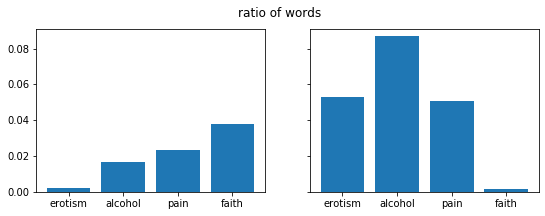

In [41]:


names_15 = list(['erotism', 'alcohol','pain',  'faith'])
values_15 = list([0.002049, 0.016401, 0.023338,  0.037783])

names_19 = list(['erotism', 'alcohol','pain',  'faith'])
values_19 = list([0.053148, 0.086767, 0.050607,  0.001610])

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[1].bar(names_19, values_19)
axs[0].bar(names_15, values_15)

fig.suptitle('ratio of words')
plt.savefig('ratio_of_words.png')